In [5]:
#supervised learning (trial and error)
#as opposed to unsupervised (takes in data and puts into clusters)

import sys

!$sys.executable -m pip install tensorflow

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

print("dies")


TensorFlow version: 2.10.0
dies


In [71]:
import pandas as pd

!$sys.executable -m pip install scikit-learn
!$sys.executable -m pip install keras

from sklearn import preprocessing

df_x = pd.read_csv('X.csv')
del df_x[df_x.columns[0]]
#df_x = df_x.pop(df_x.columns[0]) #kot
dataset_x = df_x.values


df_y = pd.read_csv('Y.csv')
del df_y[df_y.columns[0]]
dataset_y = df_y.values


X = dataset_x
Y = dataset_y

all_datas = np.hstack((dataset_x, dataset_y))
#all_datas = all_datas[0:100] #10,000 is good


df_m = pd.DataFrame(all_datas)
print(df_m.shape)

#lol making everything into one big df
#result = pd.merge(df_x, df_y)
#result = df_x.merge(df_y, left_on='lkey', right_on='rkey', suffixes=(False, False))
#end of lol


#print(all_datas.shape)
#print(result.shape)
#print(X.shape)




minimum = np.array(df_x.min(axis=0))
maximum = np.array(df_x.max(axis=0))
    

min_max_scaler = preprocessing.MinMaxScaler() #normalizes X
X_scale = min_max_scaler.fit_transform(X)


#np.savetxt("X_scale.csv", X_scale, delimiter = ",") #to output to a file



(23244, 36)


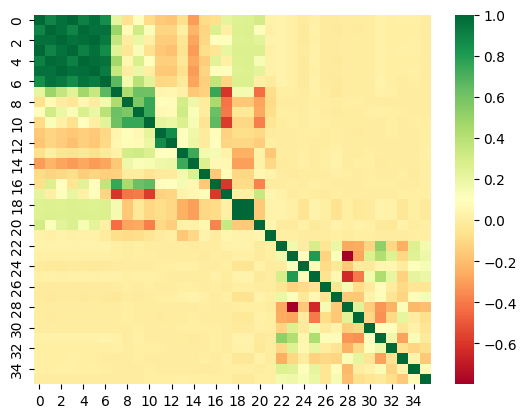

In [72]:
!$sys.executable -m pip install seaborn
import matplotlib.pyplot as mp
import seaborn as sb


# corrmat = result.corr()
# print(corrmat)
# most_corr_features = corrmat.index
# print(corrmat.index)

#mp.figure(figsize=(52,52))
#plot heat map
dataplot=sb.heatmap(df_m.corr(),annot=False,cmap="RdYlGn")

mp.show()


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))
#X_test = np.asarray(X_test).astype('float32').reshape((-1,1))

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(16270, 22) (3487, 22) (3487, 22) (16270, 14) (3487, 14) (3487, 14)


In [37]:
#Kot: added some imports
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from keras.layers import LSTM #trying a new model


#lower learning rate??
# from keras import backend as K
# K.set_value(model_3.optimizer.learning_rate, 0.001)



#old model that failed
# model_3 = Sequential([
#     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(22,)),
#     Dropout(0.2), #used to be 0.3
#     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.2), #used to be 0.3
# #     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
# #     Dropout(0.3),
# #     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
# #     Dropout(0.3),
#     Dense(14, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
# ])


# model_3.compile(optimizer='adam',
#               loss='mean_squared_error', #used to be binary_crossentropy
#               metrics=['mean_squared_error']) #used to be accuracy, but apparently that's for classification problems

# hist_3 = model_3.fit(X_train, Y_train,
#           batch_size=32, epochs=20) #batch size used to be 32


model = Sequential()
model.add(LSTM(units=25,return_sequences=True,input_shape=(X_train.shape[1], 1))) #units used to be 50

# model.add(Dropout(0.2))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=15)) #units used to be 50
# model.add(Dropout(0.2))

model.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(14, activation = 'softmax'))

#model.add(Dense(units=14))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=8,batch_size=512) #was 60 epochs

Epoch 1/8
32/32 [==============================] - 6s 131ms/step - loss: 5080412160.0000
Epoch 2/8
32/32 [==============================] - 4s 128ms/step - loss: 5080405504.0000
Epoch 3/8
32/32 [==============================] - 4s 131ms/step - loss: 5080405504.0000
Epoch 4/8
32/32 [==============================] - 4s 134ms/step - loss: 5080405504.0000
Epoch 5/8
32/32 [==============================] - 4s 130ms/step - loss: 5080405504.0000
Epoch 6/8
32/32 [==============================] - 4s 129ms/step - loss: 5080406528.0000
Epoch 7/8
32/32 [==============================] - 4s 128ms/step - loss: 5080406016.0000
Epoch 8/8
32/32 [==============================] - 4s 133ms/step - loss: 5080405504.0000


In [14]:
#Kot: Already installed it at the top

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [39]:
prediction = model.predict(X_test[1:7])

print(prediction)


# 1/1 [==============================] - 0s 18ms/step
# [[1.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
#   0.0000000e+00 2.9805187e-13 0.0000000e+00 5.6807171e-08 1.0000000e+00
#   1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]]

1/1 [==============================] - 0s 24ms/step
[[7.21488773e-15 1.10664941e-16 4.79216004e-17 4.81623844e-18
  2.40721576e-16 6.16248696e-17 6.16886088e-17 3.87700070e-20
  2.77080465e-16 4.85514488e-17 1.03439902e-16 1.00000000e+00
  4.26284892e-19 8.77802676e-17]
 [7.18007383e-15 1.10079700e-16 4.76927261e-17 4.79078650e-18
  2.39563681e-16 6.13230612e-17 6.14127209e-17 3.85424742e-20
  2.75705598e-16 4.83215951e-17 1.03007935e-16 1.00000000e+00
  4.24032143e-19 8.73700258e-17]
 [7.11520805e-15 1.08938436e-16 4.71556113e-17 4.73717651e-18
  2.37254590e-16 6.06650688e-17 6.08063976e-17 3.80443564e-20
  2.73164817e-16 4.77901581e-17 1.01926380e-16 1.00000000e+00
  4.18863453e-19 8.64510149e-17]
 [7.19864079e-15 1.10374038e-16 4.77943535e-17 4.80418311e-18
  2.40175822e-16 6.14717883e-17 6.15593172e-17 3.86480366e-20
  2.76453343e-16 4.84278878e-17 1.03193964e-16 1.00000000e+00
  4.25143228e-19 8.75558635e-17]
 [7.20748805e-15 1.10533306e-16 4.78627713e-17 4.80922560e-18
  2.404049

In [79]:
#linear regression to find closest song match
import random

songs_file= 0 #raw data from the tracks
with open("tracks_features.csv",'r') as songs:
    songs_file = songs.read()
    

#find a random 10000 songs out of the 1 million song dataset (bc otherwise too slow)
songs_file = random.sample(songs_file.split('\n')[1:], 10000)
    

#put raw data from tracks into list named songs
songs = []
for line in songs_file:
    line_end = line.split("True,")[-1] if 'True' in line else line.split("False,")[-1]
    line = line.split(",")

    songs.append(line_end.split(',')[:-1])
    



#visualize as the physical distance between each point in an x dimensional world, where x is number of attributes
#find the smallest distance

smallest = 10000000
smallest_index = 0



def normalize(values):
    return (values - minimum)/(maximum - minimum)


b = list(map(float, "90.4,73.2,79.7,96.3,73.2,81.5,71.7,77.9,0.08,100.0,8.33,0.0,0.0,29.9,11.8,115.6,39.1,9.9,513.6,44.6,5.0,0.25".split(",")))
#b = np.array(list(b)) #turning the data we're trying to match (b) into np vector
b = model.predict(np.array([np.array(normalize(b))])) 

for c,i in enumerate(songs):
        try:
            a = np.array(list(map(float,i))) #turning song into np vector

            dist = np.linalg.norm(a-b)
            #print(dist)

            if dist < smallest:
                smallest = dist
                smallest_index = c
        except:
            pass


print(songs_file[smallest_index+1])
    

1/1 [==============================] - 0s 24ms/step
6Kw4Xv15iNcSH6CEOmOlfp,Flash Flood,XXV,21ScS5p3xlRHMwGoWAWlY6,['The Hentchmen'],['7jKdcTLxl5PvTJ27fxQRwh'],2,1,False,0.436,0.858,0,-6.404,0,0.047,0.000299,4.85e-05,0.141,0.867,143.205,143906,4.0,2017,2017-12-12


In [90]:
len(X_test[1])

22

In [93]:
b = list(map(float, "90.4,73.2,79.7,96.3,73.2,81.5,71.7,77.9,0.08,100.0,8.33,0.0,0.0,29.9,11.8,115.6,39.1,9.9,513.6,44.6,5.0,0.25".split(",")))
len(b)

22

In [74]:
model.save("awful_yeast")

INFO:tensorflow:Assets written to: awful_yeast/assets


INFO:tensorflow:Assets written to: awful_yeast/assets


In [80]:
maximum

array([9.770e+01, 7.710e+01, 8.580e+01, 1.063e+02, 7.710e+01, 9.210e+01,
       7.360e+01, 9.740e+01, 1.834e+00, 1.000e+02, 8.750e+01, 6.000e-01,
       5.000e-01, 5.170e+01, 2.640e+01, 3.571e+02, 1.000e+02, 9.900e+00,
       5.587e+02, 4.800e+01, 1.000e+01, 1.000e+00])

In [81]:
minimum

array([25.7,  7.9, 16.1, 15. , -8.8,  3.1,  2.4, 28.3,  0. ,  0. ,  0. ,
        0. ,  0. ,  4.7,  4.6,  0.5,  0. ,  2.1, 16. ,  1.4,  1. ,  0. ])